## Installing necessary packages

In [3]:
! pip install numpy
! pip install matplotlib
! pip install python-igraph

## Import libraries

In [205]:
import numpy as np
from igraph import *
import matplotlib.pyplot as plt


# Produza redes scale free sintetizadas de acordo com o modelo BA. 

## Considere m novas ligações por nó introduzido.

### Calcule empiricamente as propriedades CC e APL, compare com os resultados obtidos para redes do mesmo tamanho , geradas pelo modelo de Poisson e pelo modelo WS. O que observa?

### Function to generate a graph with BA model given m

In [5]:
def generateGraphBA(m,n, start_from = None):
  g = None
  
  g = Graph.Barabasi(m=m,n=n)
  return g

In [55]:
def generateGraphPoisson(n,m):
  g = None

  g = Graph.Erdos_Renyi(n=n,m=m)
  return g

In [62]:
def generate_Watts_Strogatz(dim, size, nei, p):
  g = None

  g = Graph.Watts_Strogatz(dim=dim, size=size, nei=nei, p=p)
  return g

In [180]:
n = 1000
m = 2
mpoisson = m*n
mws=m

graphBA = generateGraphBA(m=m,n=n)
graphPoisson = generateGraphPoisson(n=n,m =mpoisson)
graphWS = generate_Watts_Strogatz(dim=1,size=n,nei=m, p=0.2)

In [181]:
def plot_graph(g, key= None):
  value = range(0,len(g.vs))
  if key :
    value = g.vs[key]
  color_dict = {0:'#B6D7A8',1:'#F9CB9C',2:'#FFE599',3:'#A4C2F4',4:'#A2C4C9'}
  g.vs["color"] = [(color_dict[0]) for index in range(0,len(g.vs))]
  g.vs["label"] =  value
  g.vs["size"] = 35
  layout = g.layout_kamada_kawai()
  return g,layout
  

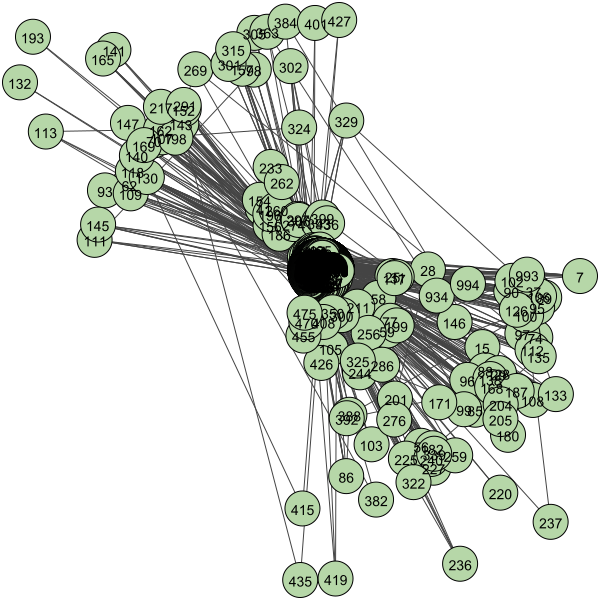

In [182]:
graph, layout = plot_graph(graphBA)
apl_ba = graph.average_path_length()
cc_ba = graph.transitivity_undirected()
plot(graph, layout = layout)

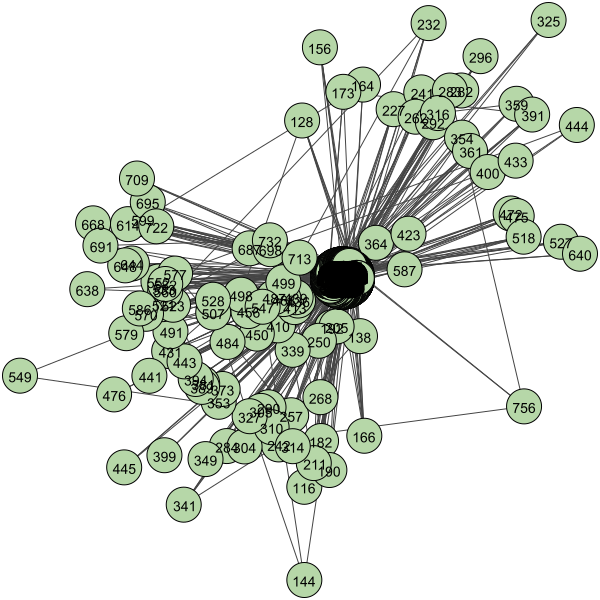

In [183]:
graph, layout = plot_graph(graphPoisson)
apl_poisson = graph.average_path_length()
cc_poisson = graph.transitivity_undirected()
plot(graph, layout = layout)


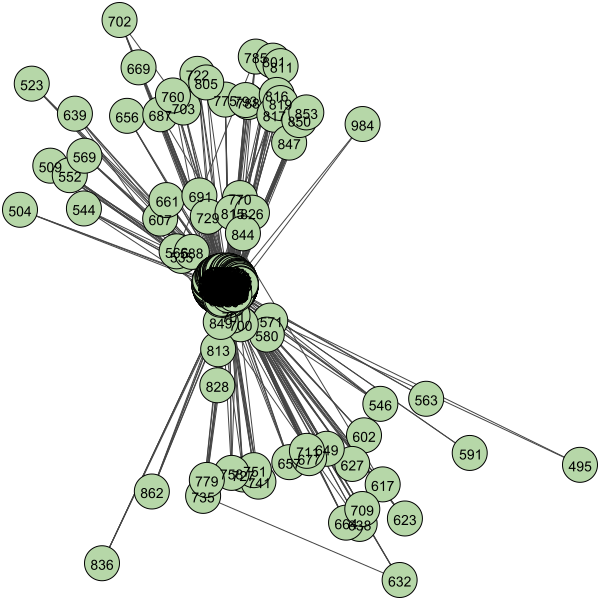

In [184]:
graph, layout = plot_graph(graphWS)
apl_ws = graph.average_path_length()
cc_ws = graph.transitivity_undirected()
plot(graph, layout = layout)

In [185]:
print(apl_ba)
print(apl_poisson)
print(apl_ws)
print(cc_ba)
print(cc_poisson)
print(cc_ws)

4.31964964964965
5.105699327593479
5.856518518518518
0.010818534394774443
0.0041519879214896825
0.1136094674556213


In [186]:
n_array= [10,50,100,200, 400, 1000]
apl_ba_array = [1.73 , 2.8  , 3.1   , 3.5   , 3.85  , 4.34]
apl_ws_array = [1.62 , 3.2  , 3.7  , 4.37  , 5     , 5.8 ]
apl_poisson_array =[1.55  , 2.9  , 3.35   , 3.94  , 4.45  , 5.11]
cc_ba_array = [0.39 , 0.11 , 0.067 , 0.033 , 0.023 , 0.08]
cc_ws_array = [0.46 , 0.16 , 0.11 , 0.114 , 0.111 , 0.112]
cc_poisson_array =[0.375 , 0.09 , 0.0027 , 0.025 , 0.011 , 0.004]


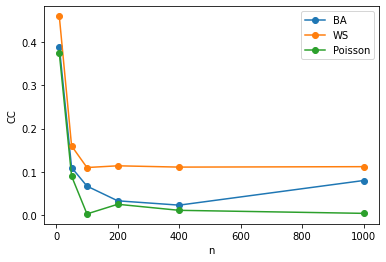

In [213]:
plt.savefig('pdf')
plt.xlabel("n")
plt.ylabel("CC")
plt.plot(n_array,cc_ba_array,marker = 'o',label='BA')
plt.plot(n_array,cc_ws_array,marker = 'o',label='WS')
plt.plot(n_array,cc_poisson_array,marker = 'o',label='Poisson')
plt.legend()
plt.savefig(format='pdf',fname='CC.pdf')
plt.show()


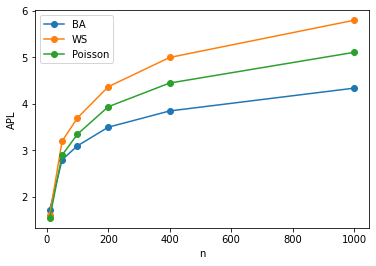

In [214]:
plt.xlabel("n")
plt.ylabel("APL")
plt.plot(n_array, apl_ba_array,marker = 'o',label='BA')
plt.plot(n_array,apl_ws_array,marker = 'o',label='WS')
plt.plot(n_array,apl_poisson_array,marker = 'o',label='Poisson')
plt.legend()
plt.savefig(format='pdf',fname='APL.pdf')
plt.show()